<a href="https://colab.research.google.com/github/mamuncseru/tensorflow_zero_to_mastery/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

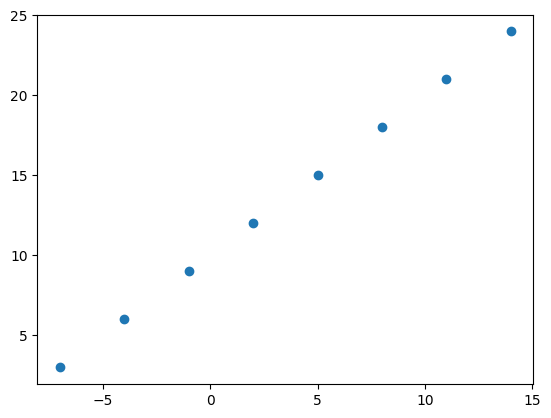

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

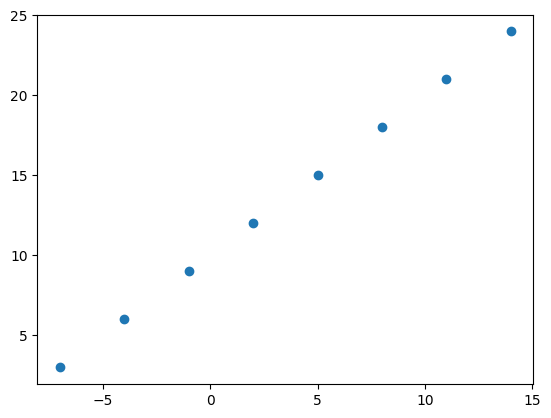

In [12]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model -letting the model try to find patterns between X & y (features and labels)

In [13]:
# set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 8.9182 - mae: 8.9182
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 8.7857 - mae: 8.7857
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 8.6532 - mae: 8.6532
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 8.5207 - mae: 8.5207
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 8.3882 - mae: 8.3882


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 179ms/step


array([[25.279247]], dtype=float32)

In [16]:
y_pred + 16

array([[41.279247]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (also called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18.2776 - mae: 18.2776
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 17.9964 - mae: 17.9964
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 17.7151 - mae: 17.7151
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 17.4339 - mae: 17.4339
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 17.1526 - mae: 17.1526
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 16.8714 - mae: 16.8714
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 16.5901 - mae: 16.5901
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 16.3089 - mae: 16.3089
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 16.0276 - mae: 16.0276
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 15.7464 - mae: 15.7464
Epoch 11/100
1/1 [==============================] -

In [18]:
# Remind ourselves of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved ...
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 91ms/step


array([[29.706015]], dtype=float32)

In [20]:
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.1471 - mae: 12.1471
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 11.5310 - mae: 11.5310
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8520 - mae: 10.8520
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.0653 - mae: 10.0653
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0893 - mae: 9.0893
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7867 - mae: 7.7867
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 6.0777 - mae: 6.0777
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 4.1068 - mae: 4.1068
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 3.9832 - mae: 3.9832
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 4.0586 - mae: 4.0586
Epoch 11/100
1/1 [==============================] - 0s 37ms/ste

In [21]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 132ms/step


array([[29.595171]], dtype=float32)

In [22]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1102 - mae: 13.1102
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8443 - mae: 12.8443
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 12.5837 - mae: 12.5837
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 12.3153 - mae: 12.3153
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0517 - mae: 12.0517
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7754 - mae: 11.7754
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 11.4848 - mae: 11.4848
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 11.1867 - mae: 11.1867
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 10.8835 - mae: 10.8835
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 10.6365 - mae: 10.6365
Epoch 11/100
1/1 [==============================] -

In [23]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 128ms/step


array([[31.057426]], dtype=float32)

In [24]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 14.2710 - mae: 14.2710
Epoch 2/200
1/1 [==============================] - 0s 24ms/step - loss: 13.9506 - mae: 13.9506
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 13.6445 - mae: 13.6445
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 13.3514 - mae: 13.3514
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 13.0726 - mae: 13.0726
Epoch 6/200
1/1 [==============================] - 0s 20ms/step - loss: 12.7960 - mae: 12.7960
Epoch 7/200
1/1 [==============================] - 0s 16ms/step - loss: 12.5168 - mae: 12.5168
Epoch 8/200
1/1 [==============================] - 0s 17ms/step - loss: 12.2379 - mae: 12.2379
Epoch 9/200
1/1 [==============================] - 0s 19ms/step - loss: 11.9650 - mae: 11.9650
Epoch 10/200
1/1 [==============================] - 0s 25ms/step - loss: 11.8091 - mae: 11.8091
Epoch 11/200
1/1 [==============================] -

In [25]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 75ms/step


array([[27.777843]], dtype=float32)

### Evaluating a model

In practice , a typical workflow you'll go throuth when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

when it comes to evaluation... there are 3 words you shold memoriz:

> "Visualize, visualize, visualize"

it's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itselt - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [26]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [27]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

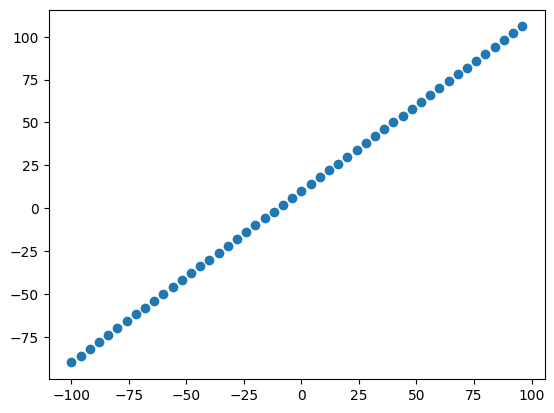

In [28]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets..

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [29]:
# Check the length of how many samples we have
len(X)

50

In [30]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

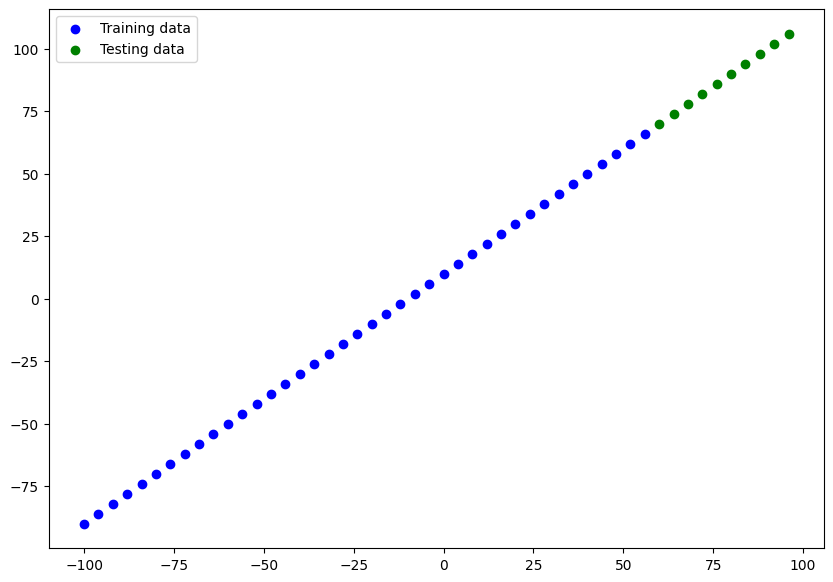

In [31]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend()
plt.show()

In [32]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the modle
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualize the model

In [33]:
model.summary()

ValueError: ignored

In [34]:
X[0].shape

TensorShape([])

In [35]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model
* **Trainable params** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training (this is a typical when you bring in already learnt parameters from other models during **transfer learning**

In [37]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [38]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


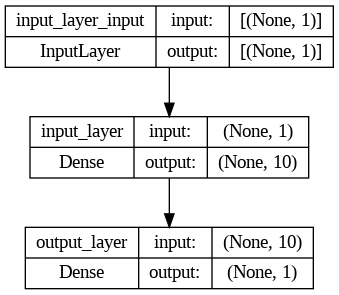

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

TO visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in a form of `y_test` or `y_true` (ground truth versus our model's prediction)

In [40]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[ 90.865   ],
       [ 96.80122 ],
       [102.73744 ],
       [108.67366 ],
       [114.60989 ],
       [120.546104],
       [126.48233 ],
       [132.41855 ],
       [138.35477 ],
       [144.29099 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

** Note ** : if you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [42]:
# Let's create a potting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    
    """
    Plots training data, test data and compares predictions to ground truth label
    """
    plt.figure(figsize=(10, 7))
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label='Training data')
    #plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model's preductions in red
    plt.scatter(test_data, predictions, c='r', label='predictions')
    #Show the legend
    plt.legend();


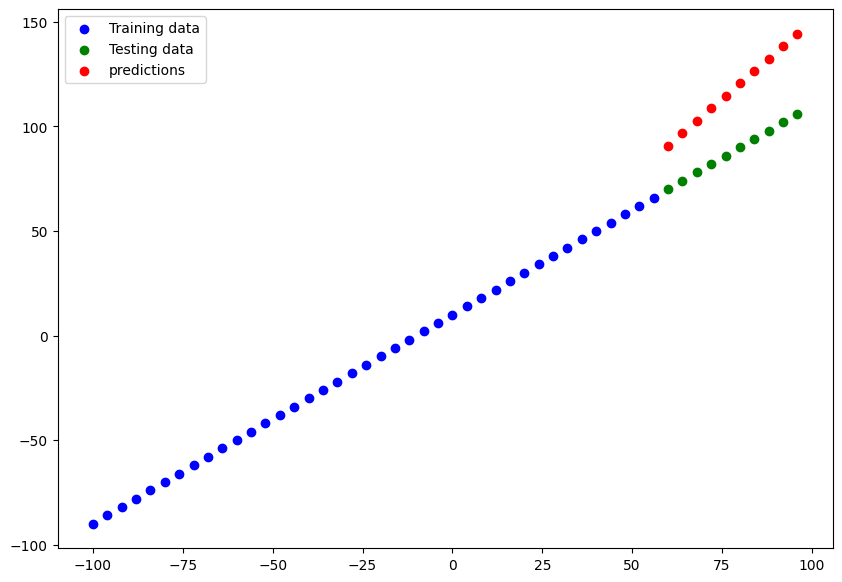

In [43]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my models predictions"
* MSE - mean squared error, "average the squared errors"

In [44]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 153ms/step - loss: 29.5780 - mae: 29.5780


[29.5779972076416, 29.5779972076416]

In [45]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.577997>

In [46]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=29.577997>

In [47]:
y_pred

array([[ 90.865   ],
       [ 96.80122 ],
       [102.73744 ],
       [108.67366 ],
       [114.60989 ],
       [120.546104],
       [126.48233 ],
       [132.41855 ],
       [138.35477 ],
       [144.29099 ]], dtype=float32)

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
# Calculate the mean squared error
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=905.78674>

In [50]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=905.78674>

In [56]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn pattern or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `mode_1`**

In [52]:
X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [53]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 37.6952 - mae: 37.6952
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4679 - mae: 10.4679
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8930 - mae: 10.8930
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4406 - mae: 9.4406
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3294 - mae: 10.3294
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5737 - mae: 9.5737
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6913 - mae: 8.6913
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0613 - mae: 9.0613
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.0408 - mae: 19.0408
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2802 - mae: 10.2802
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 56ms/step


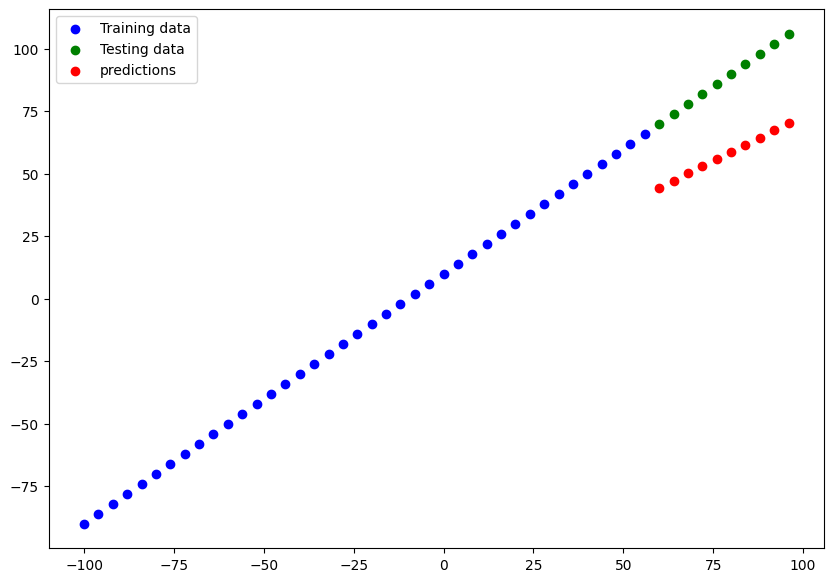

In [54]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [57]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.697027>,
 <tf.Tensor: shape=(), dtype=float32, numpy=952.8063>)

 **Build `model_2`**

 * 2 dense layers, trained for 100 epochs
 * 1st dense layer -> 16 neurons
 * 2nd dense layer -> 1 neuron

In [58]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 38.8565 - mae: 38.8565
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9659 - mae: 15.9659
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5643 - mae: 10.5643
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 12.5126 - mae: 12.5126
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 13.7756 - mae: 13.7756
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 13.4125 - mae: 13.4125
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4455 - mae: 12.4455
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 13.5497 - mae: 13.5497
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 22.6559 - mae: 22.6559
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 10.6380 - mae: 10.6380
Epoch 11/100
2/2 [==============================] -

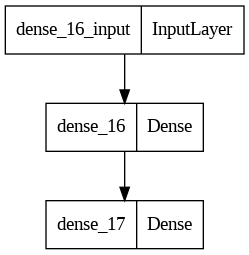

In [59]:
plot_model(model_2)

1/1 [==============================] - 0s 36ms/step


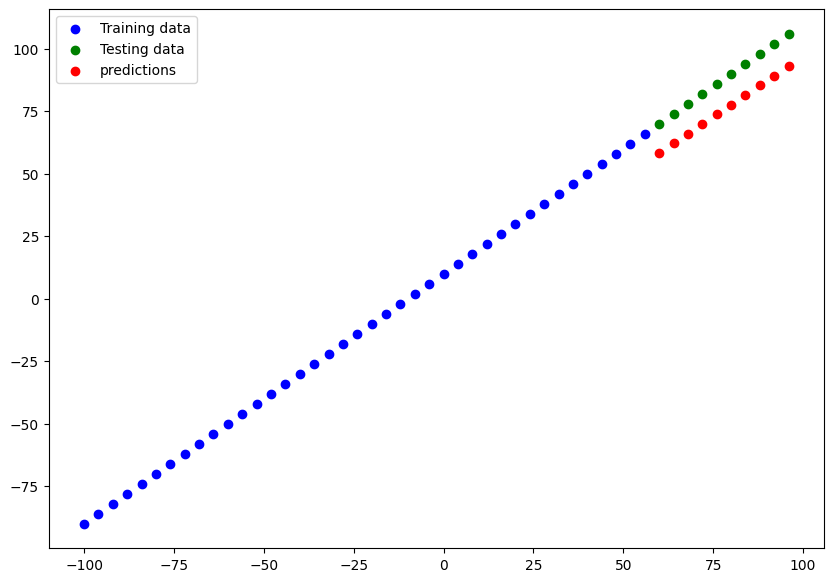

In [61]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [63]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 48.2554 - mse: 3313.2812
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 31.8765 - mse: 1517.3805
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 17.2177 - mse: 539.3444
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6660 - mse: 119.7162
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.5748 - mse: 235.5114
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0322 - mse: 151.3386
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5130 - mse: 164.0242
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5312 - mse: 220.9180
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 25.9377 - mse: 1208.8602
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 13.0392 - mse: 241.7152
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 57ms/step


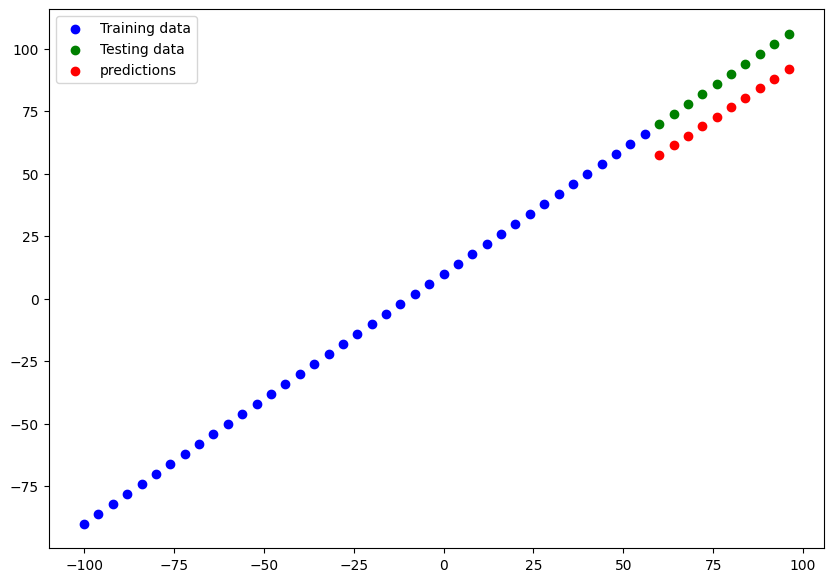

In [64]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [66]:
 mae_2 = mae(y_test, y_preds_2)
 mse_2 = mse(y_test, y_preds_2)
 mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.3077345>,
 <tf.Tensor: shape=(), dtype=float32, numpy=177.44836>)

**Build `model_3`**

*2 layers, trained for 500 epochs

In [71]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 17ms/step - loss: 43.6041 - mse: 2912.9597
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 18.3700 - mse: 532.6794
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 13.5598 - mse: 271.6483
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 6.1861 - mse: 62.8323
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 9.5902 - mse: 135.0253
Epoch 6/500
2/2 [==============================] - 0s 19ms/step - loss: 10.5402 - mse: 150.7080
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 9.7757 - mse: 156.4416
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.2645 - mse: 229.5852
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 25.2374 - mse: 1136.3130
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 13.4189 - mse: 233.7072
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 97ms/step


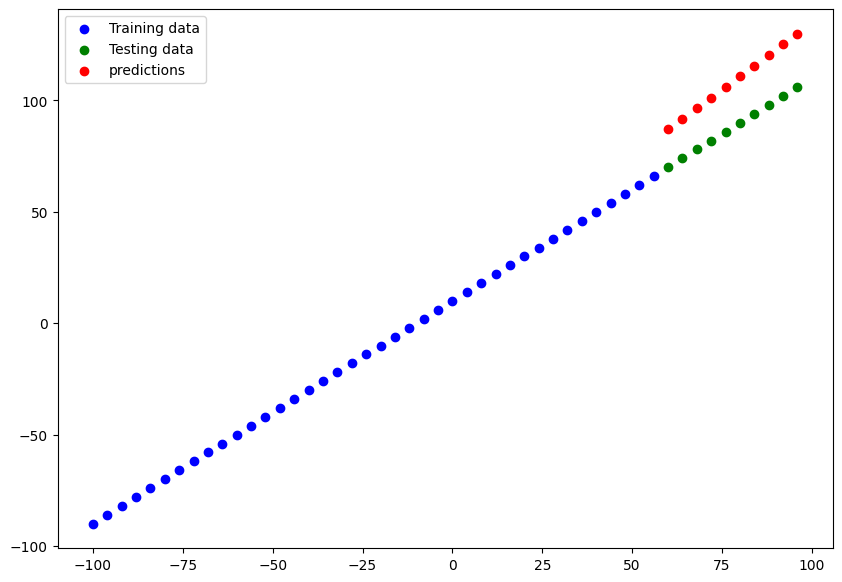

In [72]:
#Predict and plot the test result
y_preds_3 = model_3.predict(y_test)
plot_predictions(predictions=y_preds_3)

In [73]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3) 
mse_3 = mse(y_test, y_preds_3) 
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=20.459293>,
 <tf.Tensor: shape=(), dtype=float32, numpy=423.48468>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the result

In [76]:
# Let's compare our models results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.697027,952.806274
1,model_2,13.307734,177.448364
2,model_3,20.459293,423.484680


Looks like model_2 performed the best...

In [77]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


**Note:** you should be minimize the time between your experiments. the more experiments you do, the more things you'll figure out which don't work and in turn, get closerto figuring out whast does work. Remeber the machine larning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us! 


** Resource:**

* TensorBoard - a component of the Tensorflow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments

## Saving our models

Saving our models allows us to use theem outside of Google Colab (or whenever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. the HDF5 format

In [78]:
# save model 
model_2.save("best_model_SavedModel_format")

In [79]:
# save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [81]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 89ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [84]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [86]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                32        
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Check to see it loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 190ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google colab:

1. You can go the "files tab" and right click on the file and click download.
2. Use code (see the cell below)

3. Save it to google drive by connecting google drive and copying files their.

In [88]:
# Download a file from Google Colab
from google.colab import files 
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp source destination

 ## A larger example

In [91]:
# Import required libraries
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt 

In [92]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [96]:
# Create X & y values (features and labels)
# Create training and test sets
# Build a neural network sort of like model-2 above) 

In [99]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop(['charges'], axis=1)
y = insurance_one_hot['charges']
X.shape, y.shape

((1338, 11), (1338,))

#### My Solution

In [ ]:
|

In [101]:
int(len(X) * .8)

1070

In [102]:
X_train = X[:1070]
y_train = y[:1070]
X_test = X[1070:]
y_test = y[1070:]

In [103]:
# let's print the shape of all datasets
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (1070, 11)
y_train shape (1070,)
X_test shape (268, 11)
y_test shape (268,)


In [114]:
# Build a neural network
# set the random seed
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. fit the model
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13064.7148 - mae: 13064.7148
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13213.5811 - mae: 13213.5811
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 13213.1455 - mae: 13213.1455
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13212.5947 - mae: 13212.5947
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 13211.8574 - mae: 13211.8574
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 13210.7520 - mae: 13210.7520
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 13208.9238 - mae: 13208.9238
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 13205.6641 - mae: 13205.6641
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 13199.5820 - mae: 13199.5820
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss

In [115]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [118]:
# Build a neural network (sort of like model-2 above)
# set the random seed 
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8569.2031 - mae: 8569.2031
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.8232 - mae: 7884.8232
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7609.7979 - mae: 7609.7979
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7710.2261 - mae: 7710.2261
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.9404 - mae: 7623.9404
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.1807 - mae: 7595.1807
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7567.6240 - mae: 7567.6240
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7739.2588 - mae: 7739.2588
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7596.9927 - mae: 7596.9927
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7759.5273 - mae: 7759.5273

In [119]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 7454.2725 - mae: 7454.2725


[7454.2724609375, 7454.2724609375]

In [122]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. (insert your own experiment here)

In [125]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13281.1602 - mae: 13281.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13060.0859 - mae: 13060.0859
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12605.4775 - mae: 12605.4775
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11746.9854 - mae: 11746.9854
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10427.7793 - mae: 10427.7793
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8933.0957 - mae: 8933.0957
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7800.8936 - mae: 7800.8936
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7461.3740 - mae: 7461.3740
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7417.0146 - mae: 7417.0146
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7397.5757 - mae:

In [126]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4648.1167 - mae: 4648.1167


[4648.11669921875, 4648.11669921875]

In [127]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7454.2725 - mae: 7454.2725


[7454.2724609375, 7454.2724609375]

In [128]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13294.9082 - mae: 13294.9082
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13123.5996 - mae: 13123.5996
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12768.1338 - mae: 12768.1338
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12068.4199 - mae: 12068.4199
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10902.0996 - mae: 10902.0996
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9431.1562 - mae: 9431.1562
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8117.3345 - mae: 8117.3345
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7523.6670 - mae: 7523.6670
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7433.7905 - mae: 7433.7905
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.3965 - mae:

In [129]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3497.1426 - mae: 3497.1426


[3497.142578125, 3497.142578125]

In [130]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7454.2725 - mae: 7454.2725


[7454.2724609375, 7454.2724609375]

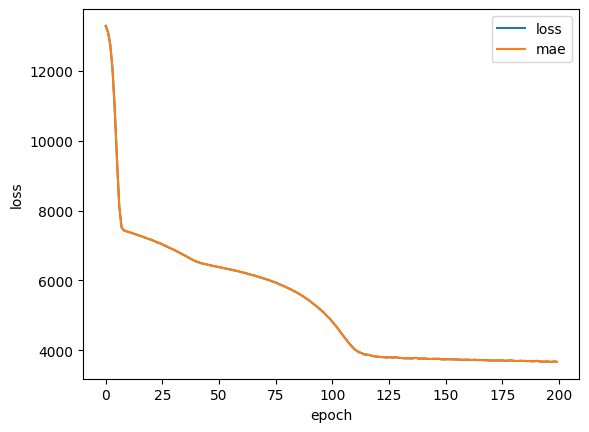

In [132]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

> **Question**: How long should you train for?

It depends. Really.. it depends on the problem you're working on. However, many people have asked this question before... so Tensorflow has a solution it's called "Early stopping". which is a Tensorflow Component you can add to your model to stop training once it increasing the loss



## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read inthe insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from scikit-learn

In [136]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", "region"]), 
)

# Create and X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train) 

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train) 
X_test_normal = ct.transform(X_test)


In [137]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [138]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [140]:
# shape
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [142]:
# Build a neural network model to fit on our normalized data
# set the random 
tf.random.set_seed(42)
# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13343.8691 - mae: 13343.8691
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.7598 - mae: 13336.7598
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13318.6309 - mae: 13318.6309
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13279.7344 - mae: 13279.7344
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13209.3828 - mae: 13209.3828
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13096.6670 - mae: 13096.6670
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12931.0977 - mae: 12931.0977
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12702.2588 - mae: 12702.2588
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12399.6826 - mae: 12399.6826
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 12016.64

In [145]:
# Evaluate our insurance 4 model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3442.3586 - mae: 3442.3586


[3442.358642578125, 3442.358642578125]

In [146]:
# Build a neural network model to fit on our normalized data
# set the random 
tf.random.set_seed(42)
# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_5.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13344.5449 - mae: 13344.5449
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13338.1777 - mae: 13338.1777
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13321.2383 - mae: 13321.2383
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13283.5127 - mae: 13283.5127
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13213.9434 - mae: 13213.9434
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13101.6152 - mae: 13101.6152
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12936.1270 - mae: 12936.1270
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12707.1309 - mae: 12707.1309
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12404.2090 - mae: 12404.2090
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12020.46

In [147]:
# Evaluate our insurance 4 model trained on normalized data
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3174.7651 - mae: 3174.7651


[3174.76513671875, 3174.76513671875]